In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv("bank-marketing.csv")

In [3]:
dataset.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
dataset.shape

(45211, 19)

In [5]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
dataset['pdays'].sort_values().tail(5)

44785    838
44858    842
44837    850
44829    854
45146    871
Name: pdays, dtype: int64

In [7]:
dataset['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
 96        57
 349       57
 363       55
 97        54
 90        54
 196       51
 365       51
 368       49
 342       49
 98        49
        ...  
 774        1
 550        1
 396        1
 492        1
 466        1
 45         1
 434        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 495        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [8]:
# number of days that passed by after the client was last contacted from a previous campaign and here -1 means the customers which contactd by bank before campaign.

In [9]:
dataset['pdays'].max()

871

In [10]:
dataset['pdays'].min()

-1

In [11]:
dataset['pdays'].mean()

40.19782796222158

In [12]:
dataset['pdays'].median()

-1.0

In [13]:
# fishy in data is, it is only from may 2008 to nov 2010 so only 579 days are possible and -1 doesn't make any sense, it may be the data of those customers which contacted by bank before campaign so it should be 999.

In [14]:
90+124+365

579

In [15]:
def pdayss(data):
    if data==-1:
        return 999
    else:
        return data

In [16]:
data=dataset.copy()

In [17]:
data['pdays']=data['pdays'].apply(pdayss)

In [18]:
# number of days that passed by after the client was last contacted from a previous campaign and here 999 means the customers which didn't get contacted after campaign.

In [19]:
data['pdays'].mean()

857.5652827851629

In [20]:
data['pdays'].min()

1

In [21]:
data['pdays'].median()

999.0

In [22]:
X=data['balance'].groupby(data['education']).median()

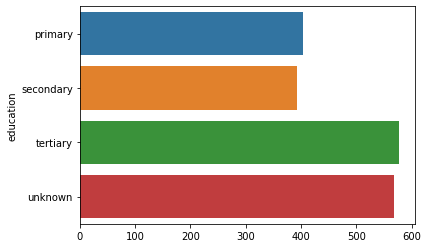

In [23]:
sns.barplot(y=X.keys(),x=X.values)

In [24]:
#tertiary group is having the highest median

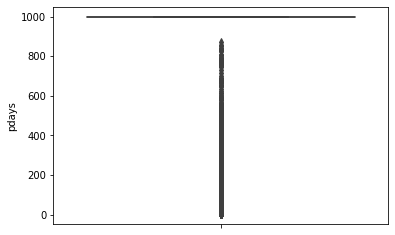

In [25]:
sns.boxplot(y=data['pdays'])


In [26]:
# there is no outliers

In [27]:
def yes_no(x):
    if x=='no':
        return 0
    else:
        return 1

In [28]:
data['response']=data['response'].apply(yes_no)

In [29]:
data['response'].value_counts()

0    39922
1     5289
Name: response, dtype: int64

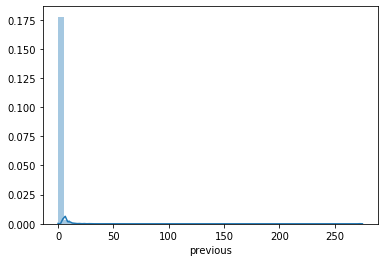

In [30]:
sns.distplot(data['previous'])

In [31]:
data['previous'].quantile(0.99)

8.900000000001455

In [32]:
data=data[data['previous']<data['previous'].quantile(0.99)]
# removed data['previous']>8.9 because it is outlier

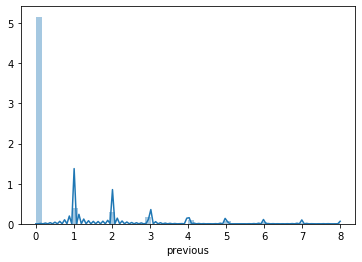

In [33]:
sns.distplot(data['previous'])

In [34]:
data['previous'].value_counts()

0    36954
1     2772
2     2106
3     1142
4      714
5      459
6      277
7      205
8      129
Name: previous, dtype: int64

In [35]:
#targeted,default, housing, loan
data['targeted']=data['targeted'].apply(yes_no)
data['default']=data['default'].apply(yes_no)
data['housing']=data['housing'].apply(yes_no)
data['loan']=data['loan'].apply(yes_no)


In [36]:
data.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [37]:
#response, targeted, default, housing, loan,

In [38]:
# job, marital, education, contact, day, month , poutcome

In [39]:
data1=data.copy()

In [40]:
data['response'].value_counts()

0    39573
1     5185
Name: response, dtype: int64

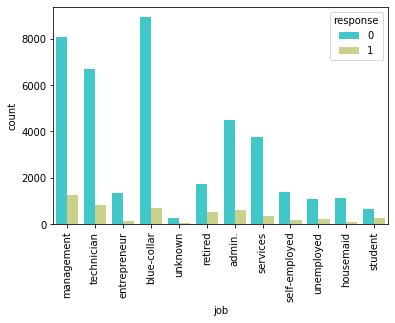

In [41]:
sns.countplot('job',hue='response',data=data,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

In [42]:
def fn(a):
    if a==0:
        return -1
    else:
        return 1
A=pd.DataFrame()
A['response']=data['response'].apply(fn)
A['job']=data['job']


In [43]:
data['response'].groupby(data['job']).sum()/data['response'].groupby(data['job']).count()

job
admin.           0.120541
blue-collar      0.072369
entrepreneur     0.082600
housemaid        0.088402
management       0.135722
retired          0.225245
self-employed    0.118362
services         0.087979
student          0.285405
technician       0.109633
unemployed       0.152595
unknown          0.118056
Name: response, dtype: float64

In [44]:
(A['response'].groupby(A['job']).sum())/(A['response'].groupby(A['job']).count())

job
admin.          -0.758918
blue-collar     -0.855262
entrepreneur    -0.834800
housemaid       -0.823195
management      -0.728556
retired         -0.549509
self-employed   -0.763276
services        -0.824043
student         -0.429189
technician      -0.780734
unemployed      -0.694810
unknown         -0.763889
Name: response, dtype: float64

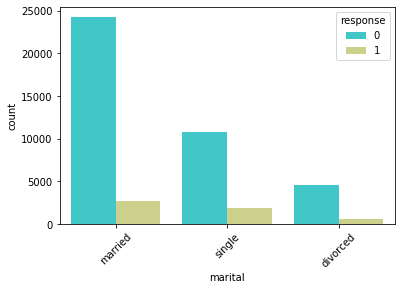

In [45]:
sns.countplot('marital',hue='response',data=data,palette='rainbow')
plt.xticks(rotation=45)
plt.show()

In [46]:
A['marital']=data['marital']
(A['response'].groupby(A['marital']).sum())/(A['response'].groupby(A['marital']).count())

marital
divorced   -0.762173
married    -0.799881
single     -0.703458
Name: response, dtype: float64

In [47]:
data['response'].groupby(data['marital']).sum()/data['response'].groupby(data['marital']).count()

marital
divorced    0.118914
married     0.100059
single      0.148271
Name: response, dtype: float64

In [48]:
data.drop('marital',axis=1,inplace=True)

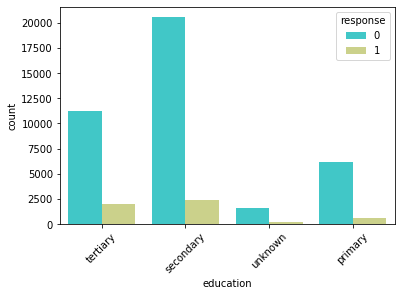

In [49]:
sns.countplot('education',hue='response',data=data,palette='rainbow')
plt.xticks(rotation=45)
plt.show()

In [50]:
A['education']=data['education']
(A['response'].groupby(A['education']).sum())/(A['response'].groupby(A['education']).count())

education
primary     -0.829405
secondary   -0.790674
tertiary    -0.702781
unknown     -0.732463
Name: response, dtype: float64

In [51]:
data.drop('education',axis=1,inplace=True)

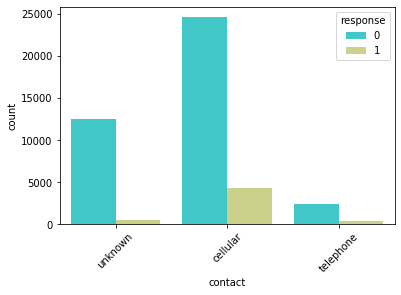

In [52]:
sns.countplot('contact',hue='response',data=data,palette='rainbow')
plt.xticks(rotation=45)
plt.show()

In [53]:
A['contact']=data['contact']
(A['response'].groupby(A['contact']).sum())/(A['response'].groupby(A['contact']).count())

contact
cellular    -0.704132
telephone   -0.732865
unknown     -0.918556
Name: response, dtype: float64

In [54]:
data.drop(['contact'],axis=1,inplace=True)

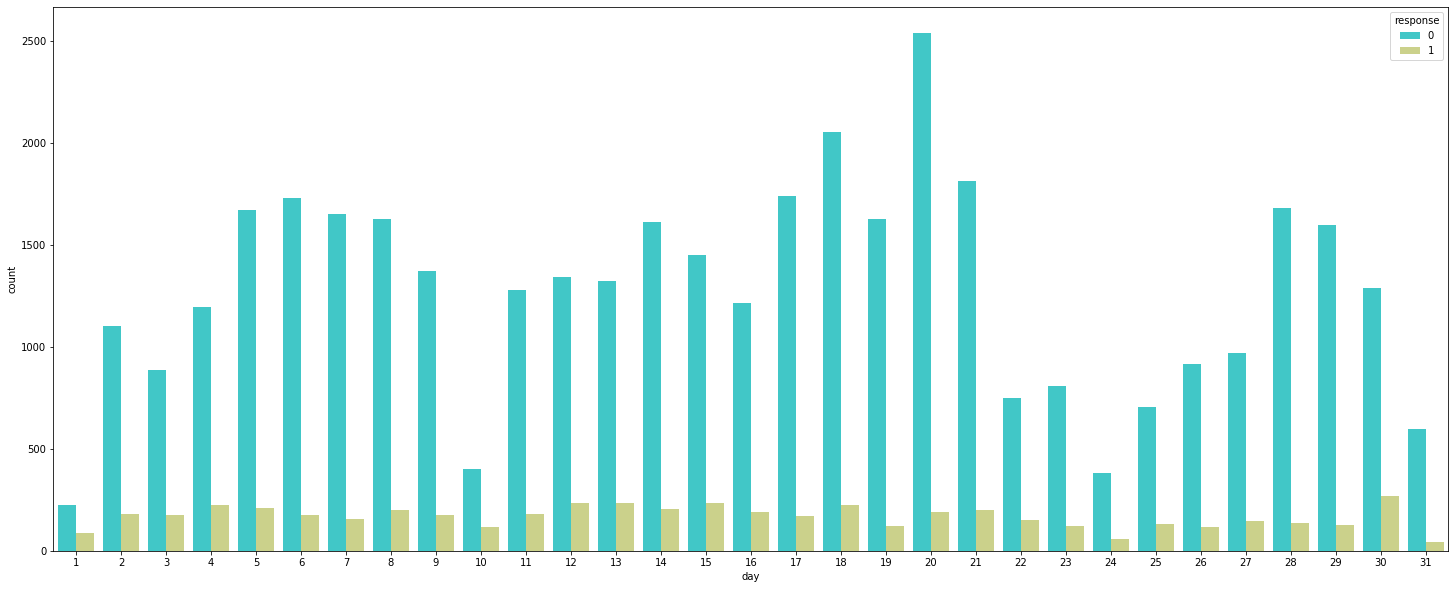

In [55]:
plt.figure(figsize=(25,10))
sns.countplot('day',hue='response',data=data,palette='rainbow')
plt.show()

In [56]:
A['day']=data['day']
(A['response'].groupby(A['day']).sum())/(A['response'].groupby(A['day']).count())

day
1    -0.441270
2    -0.720749
3    -0.667917
4    -0.683767
5    -0.775890
6    -0.814465
7    -0.828350
8    -0.783251
9    -0.773756
10   -0.544402
11   -0.753086
12   -0.703046
13   -0.700899
14   -0.774477
15   -0.724138
16   -0.730961
17   -0.820272
18   -0.801139
19   -0.861635
20   -0.860073
21   -0.802985
22   -0.666296
23   -0.736052
24   -0.735763
25   -0.686977
26   -0.777348
27   -0.735242
28   -0.849285
29   -0.853913
30   -0.657253
31   -0.859594
Name: response, dtype: float64

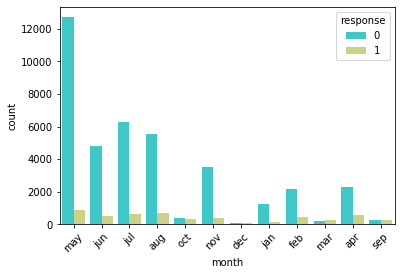

In [57]:
sns.countplot('month',hue='response',data=data,palette='rainbow')
plt.xticks(rotation=45)
plt.show()

In [58]:
A['month']=data['month']
(A['response'].groupby(A['month']).sum())/(A['response'].groupby(A['month']).count())

month
apr   -0.603741
aug   -0.783888
dec   -0.073171
feb   -0.666281
jan   -0.797671
jul   -0.820613
jun   -0.799962
mar    0.038298
may   -0.866167
nov   -0.798011
oct   -0.116084
sep   -0.078571
Name: response, dtype: float64

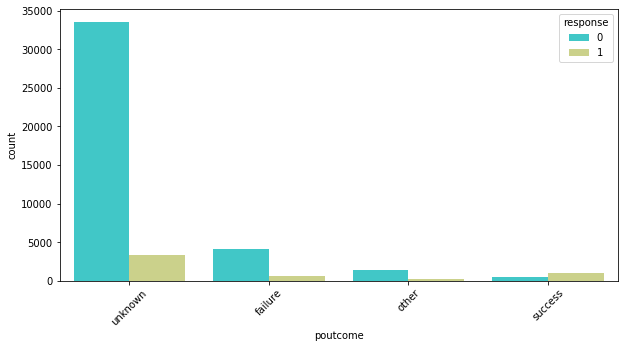

In [59]:
# poutcome
plt.figure(figsize=(10,5))
sns.countplot('poutcome',hue='response',data=data,palette='rainbow')
plt.xticks(rotation=45)
plt.show()

In [60]:
data.drop(['poutcome'],axis=1,inplace=True)

In [61]:
import statsmodels.api as sm

In [62]:
data.corr()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,pdays,previous,response
age,1.000000,0.023704,0.113389,-0.018029,0.097057,-0.185366,-0.015017,-0.009435,-0.004770,0.004957,-0.008383,0.008689,0.024113
salary,0.023704,1.000000,-0.222432,0.007458,0.054681,-0.048916,0.018352,0.027421,-0.010855,0.015921,-0.014248,0.015419,0.019241
targeted,0.113389,-0.222432,1.000000,0.008374,-0.040535,0.075409,0.066673,-0.012876,-0.009479,-0.003097,0.028550,-0.016996,-0.068890
default,-0.018029,0.007458,0.008374,1.000000,-0.066609,-0.006357,0.077418,0.009238,-0.009903,0.016798,0.040625,-0.032667,-0.021861
balance,0.097057,0.054681,-0.040535,-0.066609,1.000000,-0.068387,-0.084963,0.004783,0.021061,-0.014045,-0.036095,0.023658,0.052344
housing,-0.185366,-0.048916,0.075409,-0.006357,-0.068387,1.000000,0.040609,-0.027428,0.006687,-0.024731,-0.037782,0.040039,-0.138175
loan,-0.015017,0.018352,0.066673,0.077418,-0.084963,0.040609,1.000000,0.010730,-0.012144,0.010600,0.032543,-0.025854,-0.067168
day,-0.009435,0.027421,-0.012876,0.009238,0.004783,-0.027428,0.010730,1.000000,-0.030870,0.164260,0.076712,-0.069019,-0.029171
duration,-0.004770,-0.010855,-0.009479,-0.009903,0.021061,0.006687,-0.012144,-0.030870,1.000000,-0.083259,-0.006217,0.008185,0.395589
campaign,0.004957,0.015921,-0.003097,0.016798,-0.014045,-0.024731,0.010600,0.164260,-0.083259,1.000000,0.112596,-0.075495,-0.072368


In [63]:
# age, salary, default, day, 
data.drop(['age','salary','default'],axis=1,inplace=True)

In [64]:
# As we can see here that pdays and previous are correlated to each other, the relation is inversely proportional so its better to keep one variable.
data.drop(['previous'],axis=1,inplace=True)

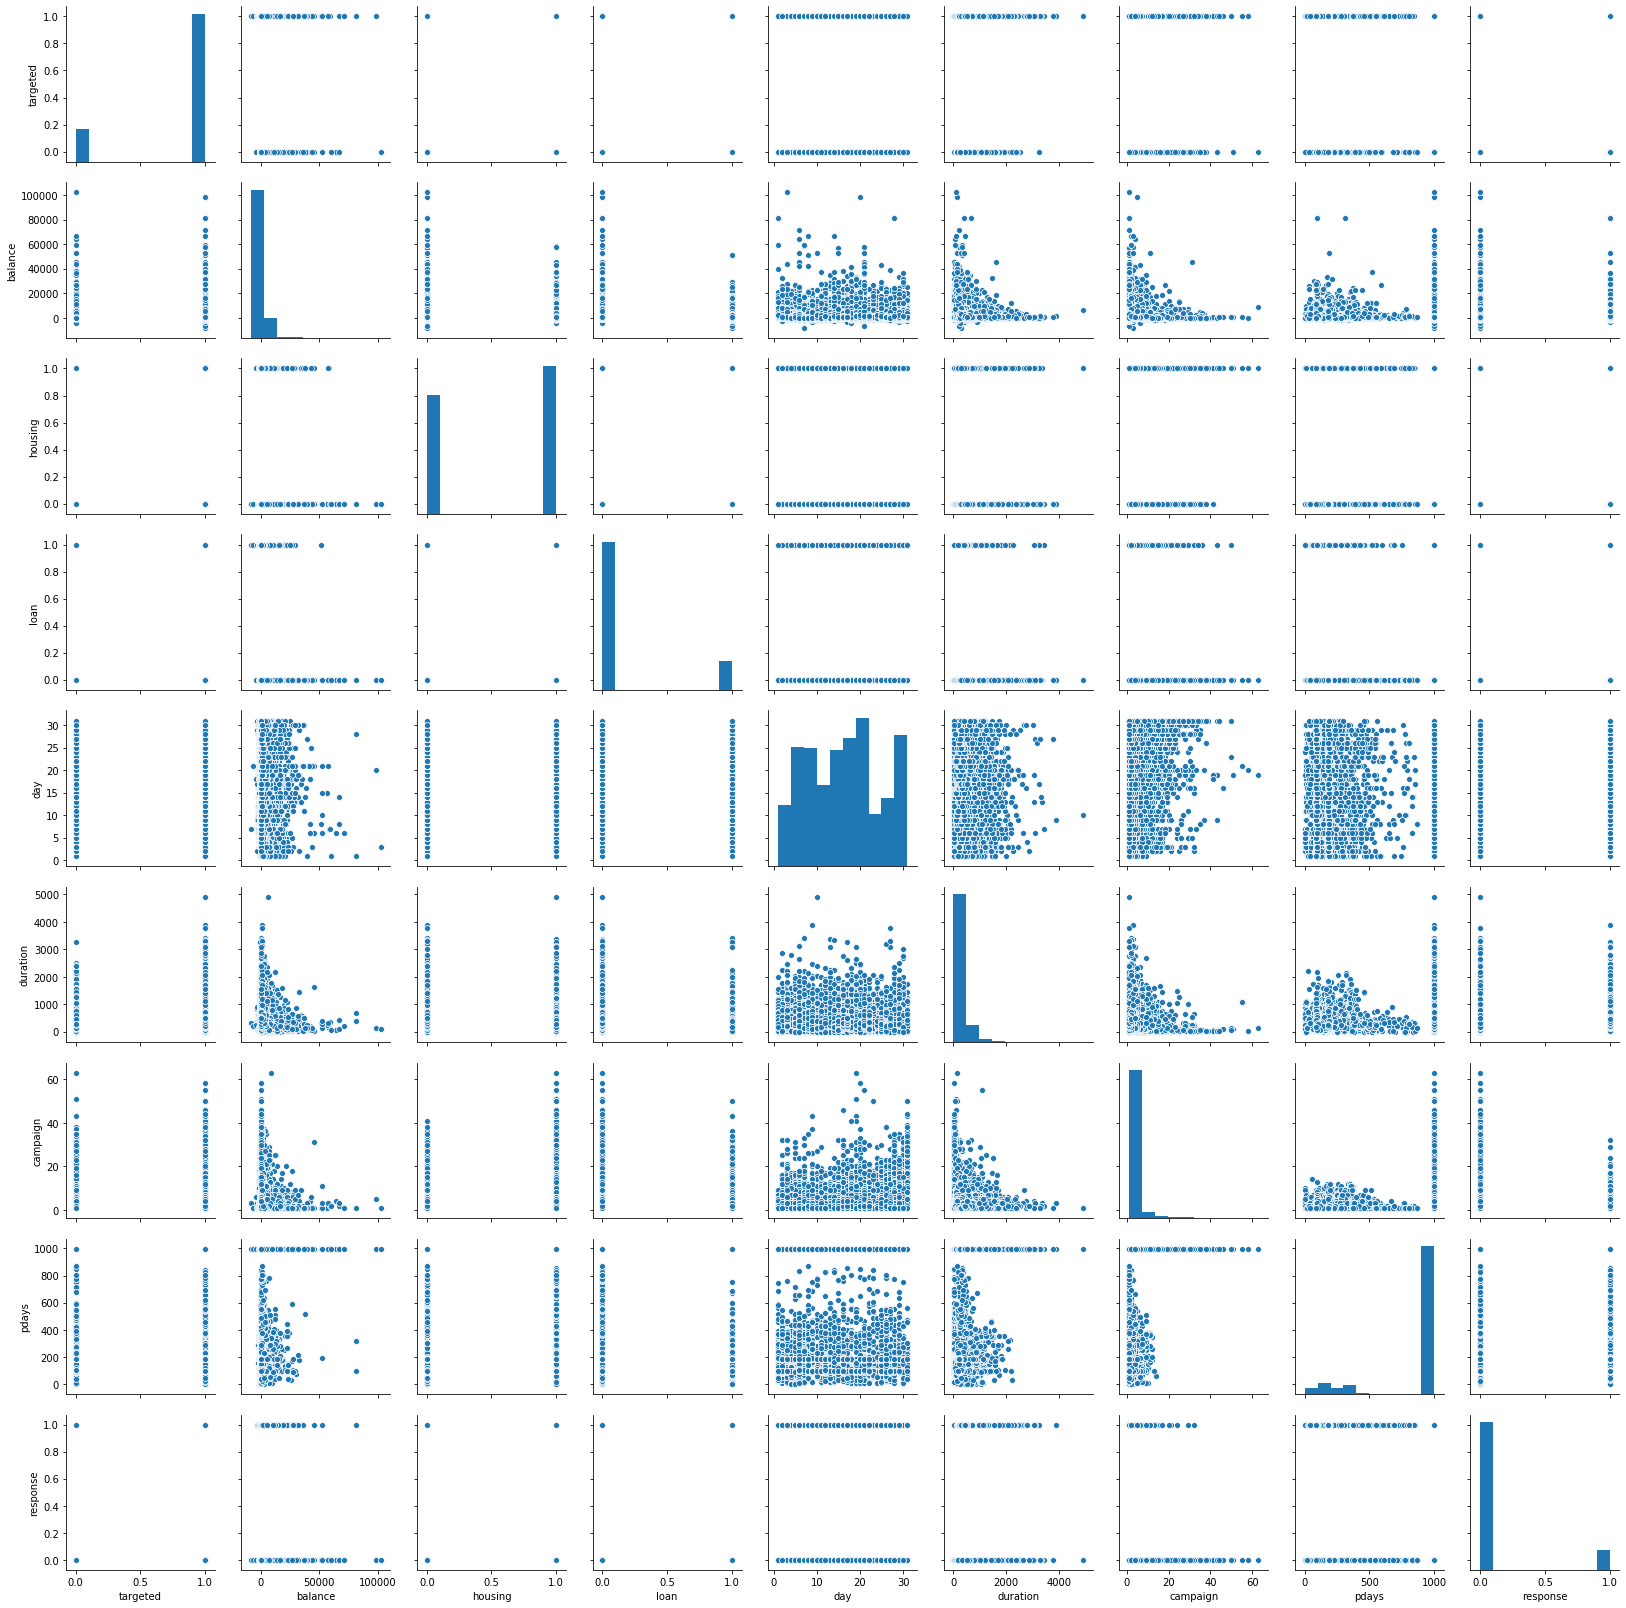

In [65]:
sns.pairplot(data)

In [66]:
# relationship between balance, duration, campaign

In [67]:
data.columns

Index(['job', 'targeted', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'response'],
      dtype='object')

In [68]:
#job,day,month

In [69]:
dataset.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [70]:
job=pd.get_dummies(data['job'],drop_first=True)
#day=pd.get_dummies(data['day'],drop_first=True)
#marital=pd.get_dummies(data['marital'],drop_first=True)
#education=pd.get_dummies(data['education'],drop_first=True)
#contact=pd.get_dummies(data['contact'],drop_first=True)
#month=pd.get_dummies(data['month'],drop_first=True)

In [71]:
data_cleaned=data.drop(['job','day','month'],axis=1)

In [72]:
#final=pd.concat([data_cleaned,month,job,day],axis=1)

In [73]:
final=pd.concat([data_cleaned,job],axis=1)

In [74]:
#final=pd.concat([final,data1['age']],axis=1)

In [75]:
final=final.drop(['targeted','campaign'],axis=1)

In [76]:
final.columns

Index(['balance', 'housing', 'loan', 'duration', 'pdays', 'response',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown'],
      dtype='object')

In [77]:
final.columns

Index(['balance', 'housing', 'loan', 'duration', 'pdays', 'response',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown'],
      dtype='object')

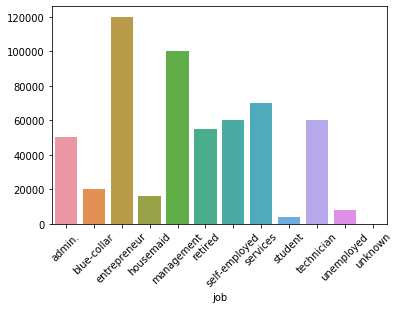

In [78]:
X=dataset['salary'].groupby(dataset['job']).mean()
sns.barplot(x=X.keys(),y=X.values)
plt.xticks(rotation=45)
plt.show()

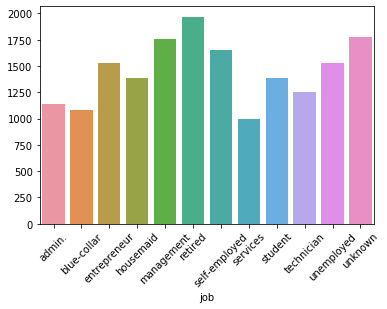

In [79]:
X=data['balance'].groupby(data['job']).mean()
sns.barplot(x=X.keys(),y=X.values)
plt.xticks(rotation=45)
plt.show()

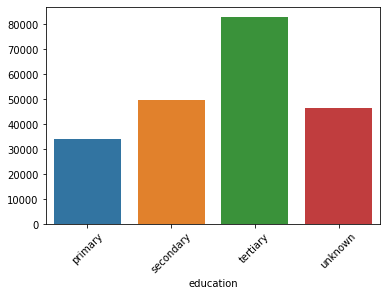

In [80]:
X=dataset['salary'].groupby(dataset['education']).mean()
sns.barplot(x=X.keys(),y=X.values)
plt.xticks(rotation=45)
plt.show()

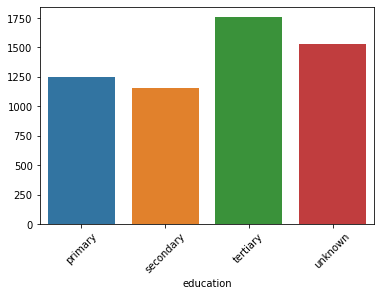

In [81]:
X=dataset['balance'].groupby(dataset['education']).mean()
sns.barplot(x=X.keys(),y=X.values)
plt.xticks(rotation=45)
plt.show()

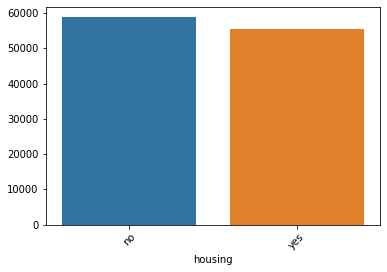

In [82]:
X=dataset['salary'].groupby(dataset['housing']).mean()
sns.barplot(x=X.keys(),y=X.values)
plt.xticks(rotation=45)
plt.show()

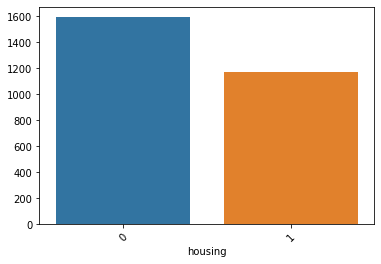

In [83]:
X=data['balance'].groupby(data['housing']).mean()
sns.barplot(x=X.keys(),y=X.values)
plt.xticks(rotation=45)
plt.show()

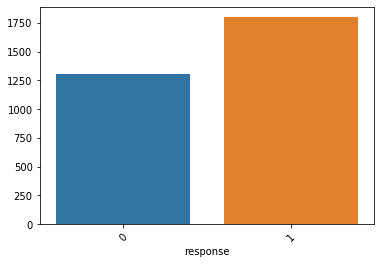

In [84]:
X=data['balance'].groupby(data['response']).mean()
sns.barplot(x=X.keys(),y=X.values)
plt.xticks(rotation=45)
plt.show()

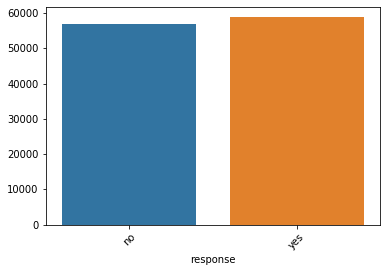

In [85]:
X=dataset['salary'].groupby(dataset['response']).mean()
sns.barplot(x=X.keys(),y=X.values)
plt.xticks(rotation=45)
plt.show()

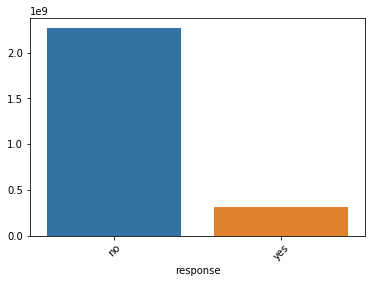

In [86]:
X=dataset['salary'].groupby(dataset['response']).sum()
sns.barplot(x=X.keys(),y=X.values)
plt.xticks(rotation=45)
plt.show()

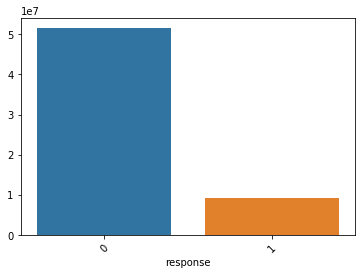

In [87]:
X=data['balance'].groupby(data['response']).sum()
sns.barplot(x=X.keys(),y=X.values)
plt.xticks(rotation=45)
plt.show()

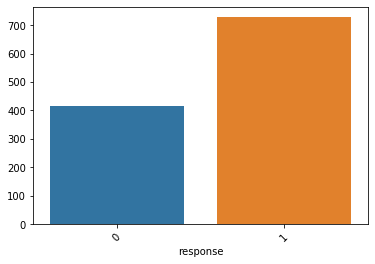

In [88]:
X=data['balance'].groupby(data['response']).median()
sns.barplot(x=X.keys(),y=X.values)
plt.xticks(rotation=45)
plt.show()

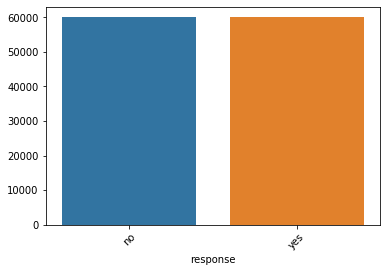

In [89]:
X=dataset['salary'].groupby(dataset['response']).median()
sns.barplot(x=X.keys(),y=X.values)
plt.xticks(rotation=45)
plt.show()

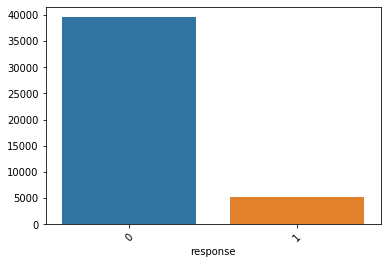

In [90]:
X=data['balance'].groupby(data['response']).count()
sns.barplot(x=X.keys(),y=X.values)
plt.xticks(rotation=45)
plt.show()

In [91]:
# data is not useful for predictions but we can make some conclusions from the previous data that by changing or vaying which parameter makes our response as YES

In [92]:
# number of days that passed by after the client was last contacted from a previous campaign and here 999 means the customers which didn't get contacted after campaign.

In [93]:
final.columns

Index(['balance', 'housing', 'loan', 'duration', 'pdays', 'response',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown'],
      dtype='object')

In [94]:
data1.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [95]:
data1.corr()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,pdays,previous,response
age,1.000000,0.023704,0.113389,-0.018029,0.097057,-0.185366,-0.015017,-0.009435,-0.004770,0.004957,-0.008383,0.008689,0.024113
salary,0.023704,1.000000,-0.222432,0.007458,0.054681,-0.048916,0.018352,0.027421,-0.010855,0.015921,-0.014248,0.015419,0.019241
targeted,0.113389,-0.222432,1.000000,0.008374,-0.040535,0.075409,0.066673,-0.012876,-0.009479,-0.003097,0.028550,-0.016996,-0.068890
default,-0.018029,0.007458,0.008374,1.000000,-0.066609,-0.006357,0.077418,0.009238,-0.009903,0.016798,0.040625,-0.032667,-0.021861
balance,0.097057,0.054681,-0.040535,-0.066609,1.000000,-0.068387,-0.084963,0.004783,0.021061,-0.014045,-0.036095,0.023658,0.052344
housing,-0.185366,-0.048916,0.075409,-0.006357,-0.068387,1.000000,0.040609,-0.027428,0.006687,-0.024731,-0.037782,0.040039,-0.138175
loan,-0.015017,0.018352,0.066673,0.077418,-0.084963,0.040609,1.000000,0.010730,-0.012144,0.010600,0.032543,-0.025854,-0.067168
day,-0.009435,0.027421,-0.012876,0.009238,0.004783,-0.027428,0.010730,1.000000,-0.030870,0.164260,0.076712,-0.069019,-0.029171
duration,-0.004770,-0.010855,-0.009479,-0.009903,0.021061,0.006687,-0.012144,-0.030870,1.000000,-0.083259,-0.006217,0.008185,0.395589
campaign,0.004957,0.015921,-0.003097,0.016798,-0.014045,-0.024731,0.010600,0.164260,-0.083259,1.000000,0.112596,-0.075495,-0.072368


In [96]:
Y=final['response']
X=final.drop('response',axis=1)


In [97]:
X=sm.add_constant(X)
logit_model=sm.Logit(Y,X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.267430
         Iterations 7


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               response   No. Observations:                44758
Model:                          Logit   Df Residuals:                    44741
Method:                           MLE   Df Model:                           16
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                  0.2542
Time:                        19:03:14   Log-Likelihood:                -11970.
converged:                       True   LL-Null:                       -16049.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.2650      0.064    -19.748      0.000      -1.391      -1.139
balance        1.802e-05   4.68e-06      3.846      0.000    8.84e-06    2.72e-05
housing          -1.0151      0.037    -27.358      0.000      -1.088      -0.942
loan             -0.6180      0.057    -10.831      0.000      -0.730      -0.506
duration          0.0040   6.09e-05     65.520      0.000       0.004       0.004
pdays            -0.0017   4.67e-05    -36.920      0.000      -0.002      -0.002
blue-collar      -0.6052      0.066     -9.107      0.000      -0.735      -0.475
entrepreneur     -0.5203      0.118     -4.409      0.000      -0.752      -0.289
housemaid        -0.7022      0.126     -5.583      0.000      -0.949      -0.456
management       -0.0504      0.060     -0.839      0.401      -0.168       0.067
retired           0.2550      0.078      3.275      0.001       0.102       0.408
self-employed    -0.3131      0.103     -3.026      0.002      -0.516      -0.110
services         -0.3904      0.080     -4.902      0.000      -0.546      -0.234
student           0.7230      0.097      7.437      0.000       0.532       0.914
technician       -0.2175      0.064     -3.377      0.001      -0.344      -0.091
unemployed       -0.1414      0.104     -1.361      0.174      -0.345       0.062
unknown          -0.4806      0.211     -2.273      0.023      -0.895      -0.066
=================================================================================
"""

In [114]:
final1=final.copy()
final1.drop(['management','unemployed'],axis=1,inplace=True)
X=final1.drop('response',axis=1)
Y=final1['response']

In [115]:
X.columns

Index(['balance', 'housing', 'loan', 'duration', 'pdays', 'blue-collar',
       'entrepreneur', 'housemaid', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unknown'],
      dtype='object')

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
W = X[['balance', 'housing', 'loan', 'duration', 'pdays', 'blue-collar',
       'entrepreneur', 'housemaid', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unknown']] 
vif_data = pd.DataFrame() 
vif_data["feature"] = W.columns 
#calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(W.values, i) 
                          for i in range(len(W.columns))] 
print(vif_data)

          feature       VIF
0         balance  1.181635
1         housing  2.161557
2            loan  1.199846
3        duration  1.869943
4           pdays  3.689143
5     blue-collar  1.591954
6    entrepreneur  1.084767
7       housemaid  1.067128
8         retired  1.117106
9   self-employed  1.080776
10       services  1.240301
11        student  1.038694
12     technician  1.393274
13        unknown  1.018656


In [117]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [118]:
for train_index ,test_index in kf.split(X):
    print(train_index , test_index)

[14920 14921 14922 ... 44755 44756 44757] [    0     1     2 ... 14917 14918 14919]
[    0     1     2 ... 44755 44756 44757] [14920 14921 14922 ... 29836 29837 29838]
[    0     1     2 ... 29836 29837 29838] [29839 29840 29841 ... 44755 44756 44757]


In [119]:
#created function to get score
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [120]:
from sklearn.linear_model import LogisticRegression

In [143]:
X.columns

Index(['balance', 'housing', 'loan', 'duration', 'pdays', 'blue-collar',
       'entrepreneur', 'housemaid', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unknown'],
      dtype='object')

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [123]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [124]:
get_score(LogisticRegression(),X_train,X_test,Y_train,Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8928358653559726

In [125]:

# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 9)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 9
Selected Features: [False  True  True False False  True  True  True  True False  True  True
 False  True]
Feature Ranking: [6 1 1 4 5 1 1 1 1 3 1 1 2 1]


In [126]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
Y_pred=model.predict(X_test)

In [128]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [129]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[11619   213]
 [ 1226   370]]
0.8928358653559726


In [130]:
# By logistic Regression we got accuracy of 90.1%

In [131]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
est=RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
            'n_estimators':[10,100,200,300,400,500],
             'max_features':randint(1,3),
              'criterion':['entropy','gini'],
               'bootstrap':[True,False],
                'min_samples_leaf':randint(1,4)}


In [133]:
def hypertuning_rscv(est,p_distr,nbr_iter,X,y):
    rdmsearch=RandomizedSearchCV(est,param_distributions=p_distr,n_jobs=-1,n_iter=nbr_iter,cv=9)
    #CV= Cross-Validation (here using straitified KFold CV)
    rdmsearch.fit(X,Y)
    ht_params=rdmsearch.best_params_
    ht_score=rdmsearch.best_score_
    return ht_params,ht_score

In [134]:
rf_parameters,rf_ht_score=hypertuning_rscv(est,rf_p_dist,40,X,Y)


In [135]:
rf_parameters

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 2,
 'min_samples_leaf': 2,
 'n_estimators': 500}

In [136]:
rf_ht_score

0.8841547879708656

In [137]:
classifier=RandomForestClassifier(n_jobs=-1,bootstrap= True,criterion= 'entropy',max_depth= 3,max_features= 1,min_samples_leaf= 2,n_estimators= 50)
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [138]:
y_pred=classifier.predict(X_test)


In [139]:
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[11832     0]
 [ 1596     0]]
0.8811438784629133
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11832
           1       0.00      0.00      0.00      1596

    accuracy                           0.88     13428
   macro avg       0.44      0.50      0.47     13428
weighted avg       0.78      0.88      0.83     13428



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [140]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(classifier,X,Y,cv=10,scoring='accuracy').mean()

In [141]:
cross_val

0.8841548035428927

In [142]:
import statsmodels.api as sm